# Norm

L1 norm은 변화량의 절대값(길찾기)  
L2 norm은 유클리드 거리(피타고라스)

In [4]:
import numpy as np
v = np.array([1,-2,3])
L1_norm = sum(np.abs(v))
L2_norm = np.sqrt(sum(v*v))
print(f"L1_norm : {L1_norm}\nL2_norm : {L2_norm}")

L1_norm : 6
L2_norm : 3.7416573867739413


In [5]:
np.linalg.norm(v) # method for L2_norm

3.7416573867739413

# Inner Product

In [6]:
x = np.array([1,3,-5])
y = np.array([-2,1,2])
print(f"<x,y> = {sum(x*y)}")

<x,y> = -9


cos(theta) = <x,y>/(L2_norm(x)*L2_norm(y))

<x,y> = L2_norm(y)*L2_norm(x)*cos(theta)
<x,y> = L2_norm(y)*Proj(x)

내적의 의미는 두 벡터의 유사도(similarity)를 측정하는 연산 -> covariance

# Array

transpose matrix

In [11]:
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
A_transpose = np.transpose(A)

print(f"A = {A},\n At = {A_transpose}")

A = [[1 2 3]
 [4 5 6]
 [7 8 9]],
 At = [[1 4 7]
 [2 5 8]
 [3 6 9]]


@(row*column) vs np.inner(row*row)

In [12]:
B = np.array([[1,2,3],[-1,-2,-3],[4,1,-2]])
print(A@B)
print(np.inner(A,B))

[[ 11   1  -9]
 [ 23   4 -15]
 [ 35   7 -21]]
[[ 14 -14   0]
 [ 32 -32   9]
 [ 50 -50  18]]


Array have a role as operator

inverse matrix
 - determinant != 0
 - row_count = column_count

In [18]:
C = np.array([[1,-2,-1],[4,6,7],[1,2,1]])
C_det = np.linalg.det(C)
print(C_det)
print(np.linalg.inv(C))
A_det = np.linalg.det(A)
print(A_det)
print(np.linalg.inv(A)) # 역행렬 못구해서 에러남

-16.000000000000007
[[ 0.5     0.      0.5   ]
 [-0.1875 -0.125   0.6875]
 [-0.125   0.25   -0.875 ]]
0.0


LinAlgError: Singular matrix

Moore-Penrose
n>=m, A+ = (AtA)-1At
n<=m, A+ = At(AAt)-1

In [19]:
X = np.array([[1,2,3],[2,-1,1]])
print(np.linalg.pinv(X))

[[-6.57632300e-18  3.33333333e-01]
 [ 2.00000000e-01 -2.66666667e-01]
 [ 2.00000000e-01  6.66666667e-02]]


일반적으로 연릭방정식을 풀려면 변수의 개수보다 식의 개수가 많거나 같을 때(n>=m) 해를 구할 수 있는데 Moore-Penrose inverse를 이용하면 n<=m인 연립방정식의 해를 구할 수 있다.

선형회귀분석에서는 일반적으로 데이터(X,y)가 회귀계수(b)보다 많이 때문에 n>m 인 경우인데 계수비는 같지만 상수항이 다른 경우가 있기 때문에 방정식을 풀 수 없다. 하지만 
Moore-Penrose inverse를 이용하면 회귀계수(b)를 구할 수 있고 X와 b를 이용하면 추정량 yhat을 구할 수 있다.

하지만 회귀분석을 설명 할 때 역행렬을 이용한 설명이 아니라 경사하강법을 사용하는데 역행렬은 선형모델에서만 사용가능하기 때문이다.

# Linear Regression with inverse array

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn-linear-model-linearregression

In [ ]:
X = np.array([[1,-2,3],[7,5,0],[-2,-1,2],[1,2,4]])
y = np.array([1,2,3,2])

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(X,y)
y_test = model.predict(X)
print(y_test) # yhat
print(model.coef_) # b1,b2,b3
print(model.intercept_) # b0

In [ ]:
X_ = np.array([np.append([1],x) for x in X])
beta = np.linalg.pinv(X_) @ y
print(beta)
y_test = X_ @ beta
print(y_test)

sklearn 모듈 사용한 회귀계수와 inverse를 사용한 회귀계수가 다름 yhat은 같음...
이유를 알아봐야함.-> n=m인 경우였음

sklearn.linear_model에서 intercept를 허용하지 않으면 동일한 결과가 나옴.

데이터를 늘리니 두 방법 모두 같은 결과물을 출력함. -> n>m으로 만듬

In [ ]:
X = np.array([[1,-2],[7,5],[-2,-1]])
y = np.array([1,2,3])

In [ ]:
model = LinearRegression(fit_intercept=True)
model.fit(X,y)
y_test = model.predict(X)
print(y_test) # yhat
print(model.coef_) # b1,b2,b3
print(model.intercept_) # b0

In [ ]:
X_ = np.array([np.append([1],x) for x in X])
beta = np.linalg.pinv(X_) @ y
print(beta)
y_test = X_ @ beta
print(y_test)

지금까지 결론은 n > m이여야 정상적으로 계산됨

# Gradient Descent(GD)

In [ ]:
▽ : nabla

Abstraction

0. init_point, lreaning_rate, epsilon, function(**loss function is made with data**)
1. gradient vector
  - make gradient function(partial differential for function)
  - make gradient vector(insert init_point to gradient function)
2. gradient descent
  - update value with init_point, lreaning_rate and gradient_vector
  - check condition (norm(gradient_vector) > epsilon)
3. roof
  - condition fail, end roof

In [21]:
import numpy as np
import sympy as sym
from sympy.abc import x, y

In [11]:
loss_function = sym.poly(x**2 + 2*x + 3)
# 경사하강법 이해를 위해 손실함수가 그냥 주어졌지만 실제로는 데이터를 가지고 만듬
#loss function(손실함수) = cost function(비용함수) = objective function(목적함수)

def gradient(function,value):
    return sym.diff(function,x).subs(x,value)
# 손실함수는 아래로 볼록한 모양인데 최소값을 가지려면 기울기가 0인 지점을 찾아야 함
# 그래서 손실함수의 미분값을 0으로 만드는 x를 찾기 시작.

def gradient_descent(function,init_point=0,learning_rate=1e-2,epsilon=1e-5):
    # init_point는 경사하강법을 시작하는 지점인데 global minimum에 가깝게 정해주는게 좋음. 
    # learning rate는 극소점에 다가가는 정도를 조절하기 위한 hyperparameter. 작으면 오래걸리고 크면 변수가 커져서 무한루프가 될 수 있음.
    # epsilon은 컴퓨터 연산으로는 극소점인 0에 도착할 수 없기 때문에 무한루프를 방지하기 위한 기준
    cnt=0
    value_x = init_point
    while True:
        # gradient가 아주 작아지면 움직임에 큰 변화가 없어지기 때문에 epsilon보다 작아지면 멈춤
        gradient_x = gradient(loss_function,value_x)
        value_x = value_x - learning_rate*gradient_x
        # 기울기가 0에 가까워 질 때 까지 x를 계속 이동
        cnt+=1
        if abs(gradient_x) < epsilon:
            return value_x, loss_function.subs(x,value_x)
    
#     print(f"연산횟수 : {cnt},\n최소점 :({value_x},{loss_function.subs(x,value_x)})")
    
gradient_descent(loss_function)

(-0.999995180501276, 2.00000000002323)

In [19]:
objective_function = sym.poly(x**2 + 2*y**2)
def gradient_vector(function,value):
    value_x,value_y = value
    return np.array([sym.diff(function,x).subs(x,value_x).subs(y,value_y),sym.diff(function,y).subs(x,value_x).subs(y,value_y)],dtype=float)
def gradient_descent2(function,init_point=[np.random.uniform(-2,2),np.random.uniform(-2,2)],learning_rate=1e-2,epsilon=1e-5):
    cnt = 0
    value = init_point
    while True:
        grad_vector = gradient_vector(objective_function,value)
        value = value - learning_rate*grad_vector
        cnt+=1
        if np.linalg.norm(grad_vector) < epsilon:
            return value, grad_vector

In [20]:
gradient_descent2(objective_function)

(array([4.84142626e-06, 1.05686882e-11]),
 array([9.88046177e-06, 4.40362010e-11]))

# Linear Regression with GD

In [45]:
X = np.array([[1,1],[1,2],[2,2],[2,3]])
y = np.dot(X,np.array([1,2])) + 3

beta_gd = [10.1, 15.1, -6.5]
X_ = np.array([np.append(x,[1]) for x in X])

for t in range(5000):
    error = y - X_ @ beta_gd
    grad = -np.transpose(X_) @ error
    beta_gd = beta_gd - 0.01*grad
    
print(beta_gd)

[1.00000367 1.99999949 2.99999516]


# mini batch Sampling Gradient Descent(mini batch SGD)

full batch gradient descent(BGD)의 문제점
 1. local minimum에서 벗어날 수 없다.
 2. 가중치(w or beta or error)를 계산할때마다 모든 데이터를 사용해서 메모리도 많이 사용하고 시간도 오래걸린다.
 
문제를 해결하기 위해 sampling gradient descent(SGD)를 사용
 - 가중치를 계산 할 때 1개의 데이터만 사용해서 가중치(error)를 계산 및 업데이트하고 
   또 다른 임의의 데이터 1개를 사용해서 가중치계산 후 업데이트를 반복
 - 계산량이 줄어서 메모리사용이나 계산시간 효율이 좋아진다.
 - 하지만 노이즈가 너무 커서 global minimum에 도달하기가 쉽지 않다.

mini batch sampling gradient descent를 사용
 - batch size를 정해서 가중치를 계산할 때 batch size만큼의 데이터를 사용해서 SGD를 계산
 - batch size가 1일 때보다 노이즈가 줄어서 안정적이된다.

https://www.youtube.com/watch?v=IHYFtSX0y6A  
https://www.youtube.com/watch?v=nAT5KK0_jLY

# Deep Learning

1. 비선형모델
 - 선형모델로는 다양한 데이터를 적합시키기에 부족하다.
 - 그래서 비선형 모델이 필요하다.
 - 'activation function'(활성함수)는 선형 모델을 비선형 모델로 변환시킨다.
 - 선형 모델의 계산값을 활성함수에 대입하면 비선형 모델의 값이 나오는데 선형 모델의 값벡터 각각에 활성함수를 씌워줘서 계산한다.
 - sigmoid, tanh, ReRU, softmax, one hot 등 활성함수가 있다.

2. 딥러닝
 - 단층으로 복잡한 표현 패턴을 적용하려면 기하급수적으로 많은 parameter가 필요하다.
 - 그런데 층을 두껍게 쌓으면 적은 parameter로 복잡한 표현 패턴을 적용 할 수 있다.(최적화 된다는건 아님)
 - forwardpropagation과 backpropagation을 반복하며 objective or loss or cost finction을 최소로 만드는 가중치W를 찾아서 output을 출력

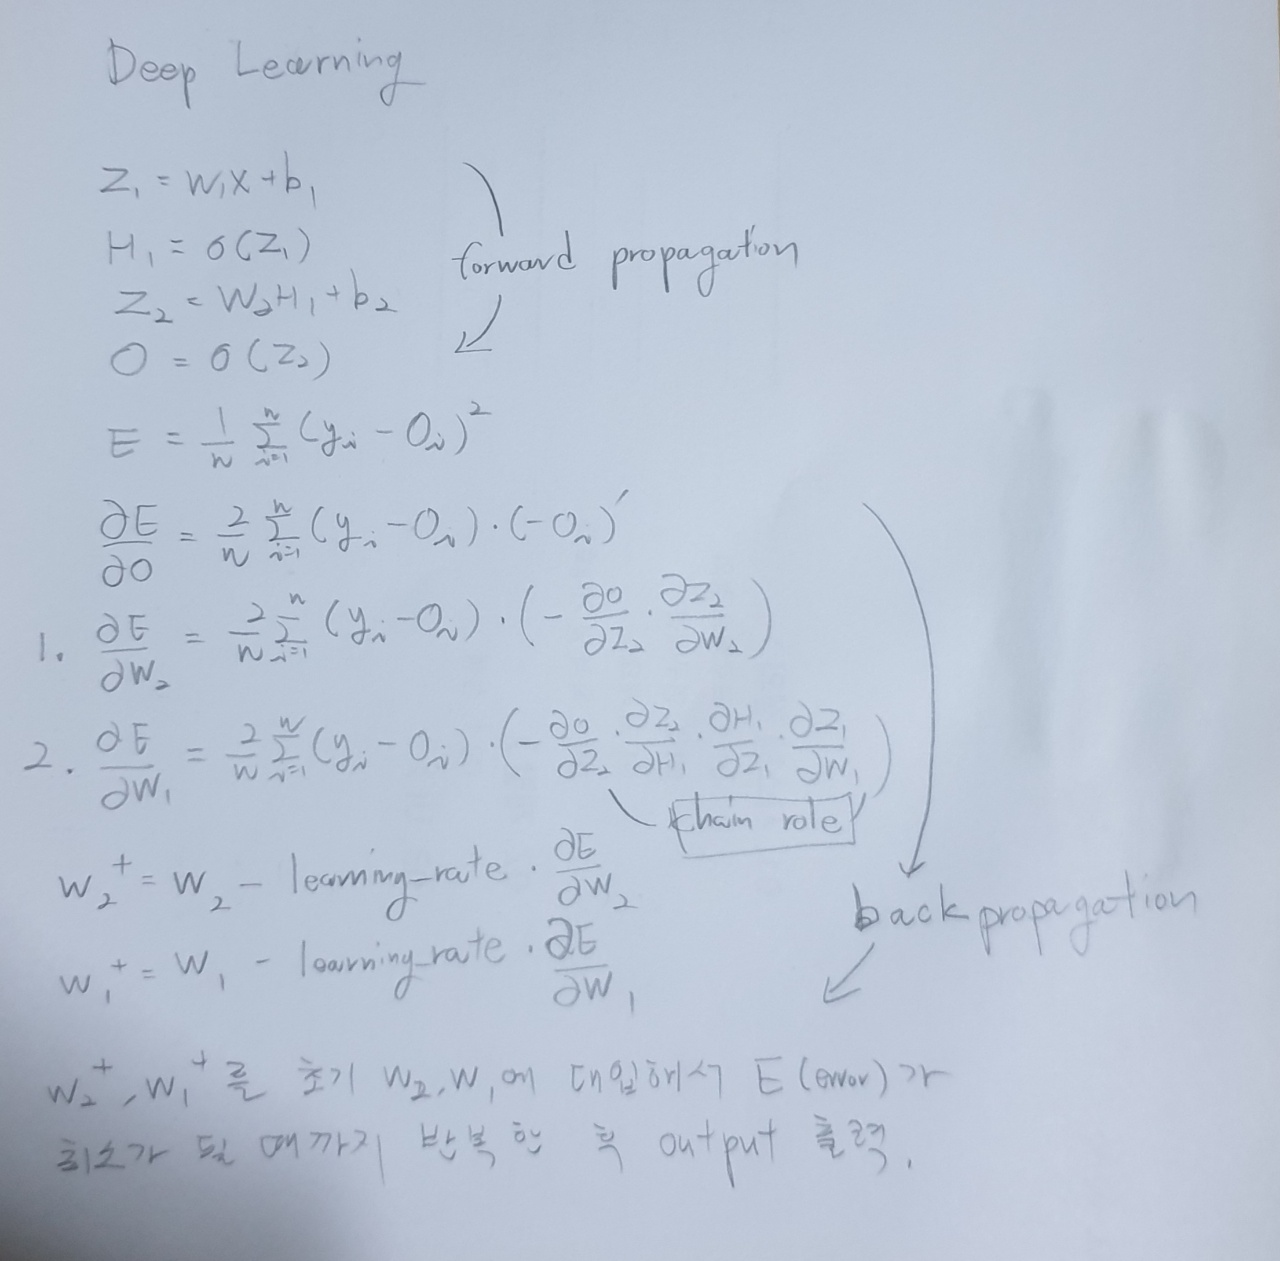

In [6]:
from IPython.display import Image 
Image("img/deep_learning.jpg")

이런 연산이 가능한 이유는 chain role 때문인데 chain role이 가능한 이유는 output을 제외한 모든 value가 주어지기 때문이다.  

x,y는 주어지는 데이터  
w는 init_point  
b도 사실상 w와 동일  

그래서 궁금한 gradient vector가 있으면 해당 원소를 변수로 놓고 편미분을 해서 편미분한 함수에 나머지 값을 채워넣으면 쉽게 구해진다.

---

# Monte Carlo Sampling

몬테카를로 방법(Monte Carlo method) (또는 몬테카를로 실험)은 반복된 무작위 추출(repeated random sampling)을 이용하여 함수의 값을 수리적으로 근사하는 알고리즘을 부르는 용어이다. 수학이나 물리학 등에 자주 사용되며, 계산하려는 값이 닫힌 형식으로 표현되지 않거나 복잡한 경우에 근사적으로 계산할 때 사용된다. 몬테카를로 방법은 주로 확률 분포에서 확률 변수값을 생성하는 작업, 수학적 최적화, 수치적분 등에서 활용된다. 알고리즘의 반복과 큰 수의 계산이 관련되기 때문에 몬테카를로 방법은 다양한 컴퓨터 모의 실험 기술을 사용하여 컴퓨터로 계산하는 것이 적합하다.

https://ko.wikipedia.org/wiki/%EB%AA%AC%ED%85%8C%EC%B9%B4%EB%A5%BC%EB%A1%9C_%EB%B0%A9%EB%B2%95

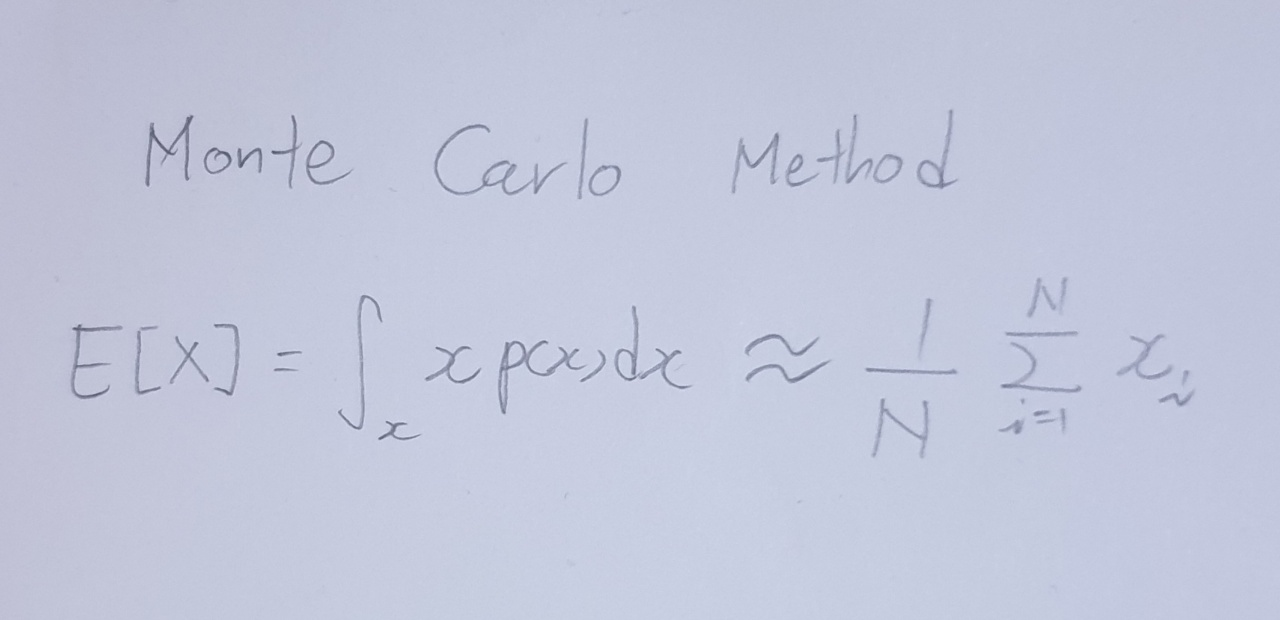

In [4]:
from IPython.display import Image 
Image("img/Monte_Carlo.jpg")

쉽게 말하면 무리수나 적분이 불가능한 값을 근사적으로 계산할 때 사용. 어떻게?

적분을 예로들면 

적분범위의 적분값을 범위의 크기로 나누면 기대값이 되는데 범위의 크기를 우변으로 넘겨서 우변의 이산적인 형태의 기대값을 구해주면 된다.

In [10]:
import numpy as np

def mc_int(fun,low,high,sample_size=100,repeat=10):
    int_len = np.abs(high-low)
    stat = []
    for _ in range(repeat):
        x = np.random.uniform(low=low, high=high, size=sample_size)
        fun_x = fun(x)
        int_val = int_len*np.mean(fun_x)
        stat.append(int_val)
    return np.mean(stat), np.std(stat)

def f_x(x):
    return np.exp(-x**2)

print(mc_int(f_x,low=-1, high=1, sample_size=10000, repeat=100))

(1.4928580216678384, 0.003921980135965378)


---

# Maximum Likelihood Estimator(MLE)

https://everyday-image-processing.tistory.com/30  
https://angeloyeo.github.io/2020/07/17/MLE.html

- likelihood를 사용해서 추정값을 구한다는 의미는? -> 샘플데이터가 따르는 분포 찾기
- 왜 likelihood를 사용해서 추정량을 구함? -> 데이터(x)의 분포를 몰라서(분포의 족(family)은 알아야 하는듯)
- 왜 likelihood에 log를 사용함? -> 계산 편하게 하려고. 계산은 쉬워지는데 의미는 변하지 않음
- 왜 'maximum' likelihood를 사용함? -> likelihood 라는 것은 지금 얻은 데이터가 이(theta) 분포로부터 나왔을 가능도를 말한다. 각 데이터의 확률이 클수록 알맞은 분포에 가깝기 때문에 각 데이터의 확률 곱이 가장 커지는 매개변수 theta를 찾아 추정값을 구한다.
 
정리
- 샘플데이터가 있고 데이터를 봤을 때 어떤 모양의 분포인지는 알겠는데 샘플데이터만으로는 추정량을 구할 수 없다. 그래서 매개변수(theta)를 변수로 놓고 각 데이터의 확률 곱이 가장 커지는 theta를 찾아서 가까운 분포를 찾는다. 그래서 샘플데이터가 어떤 매개변수를 가지는 분포를 따르는지 알 수 있다.

# Bayesian Theory

# Convolutional Neural Network(CNN)

CNN은 overfitting을 줄이기 위한 방법으로 다차원 텐서로 연산을 해서 이미지 분석으로 이해하기 쉬운데  
절차로는 convolution, pooling, fully-connected로 나눠진다.  
자세한건 week4에서  

---

# Recurrent Neural Network(RNN)

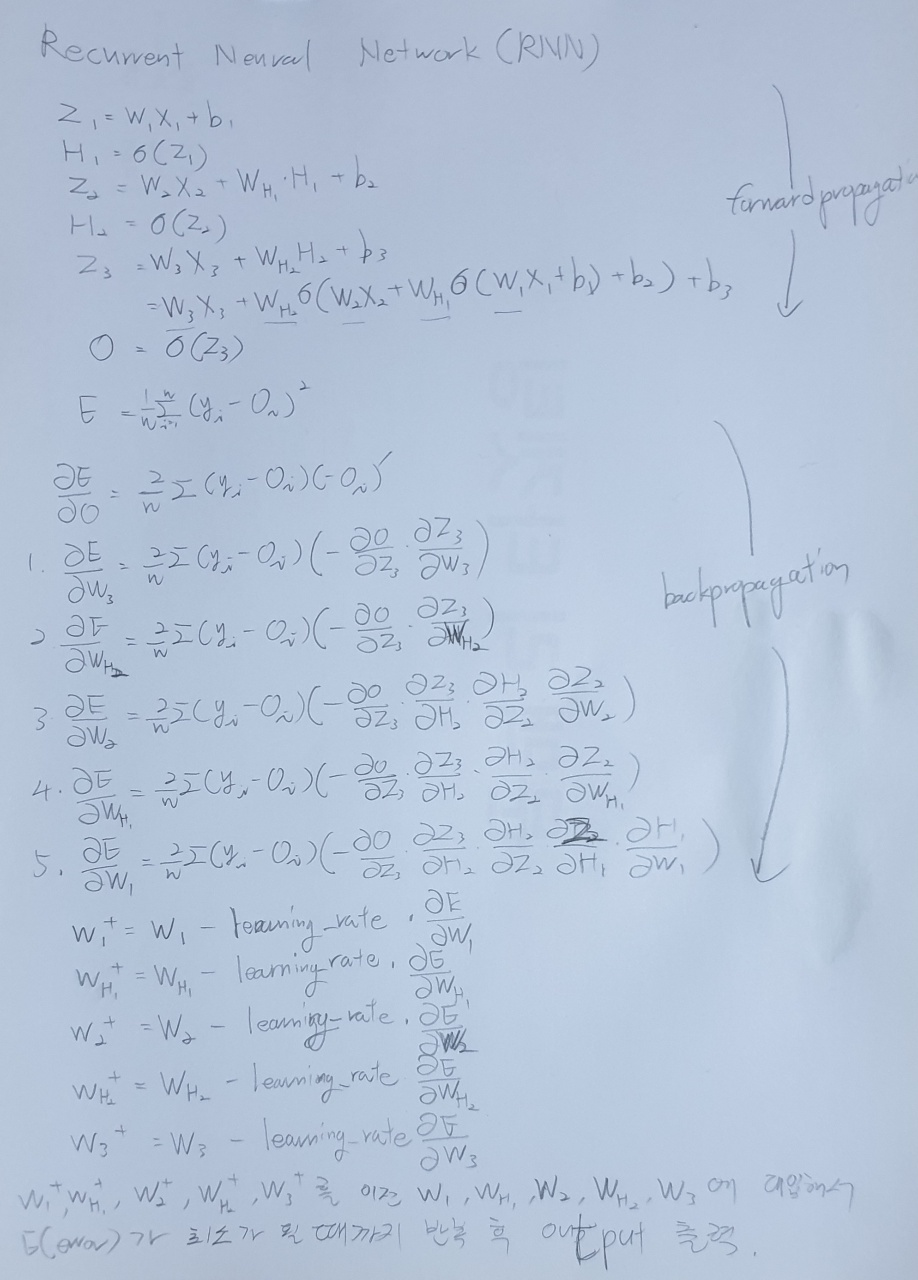

In [7]:
from IPython.display import Image 
Image("img/RNN.jpg")

위의 계산은 틀렸다. 미래의 데이터가 들어왔을 때 과거의 가중치가 변하기 때문이다.

**RNN에서 가중치(w)는 시점(t)에 대해서 변하지 않는다.**